<a href="https://colab.research.google.com/github/Jandsy/ml_finance_imperial/blob/main/Programming_Sessions/Programming_Session_5/Solution_Programming_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 5 - Introduction to Sequence Models Solution - </center>



**Introduction:**

This session aims to explore two fundamental aspects of sequence modeling: a Numpy implementation of a standard Recurrent Neural Network (RNN) and the classification of MNIST digits using Long Short-Term Memory (LSTM) networks.

**Challenge:**

The primary challenge involves grasping the intricacies of sequence modeling techniques, understanding their implementation from scratch, and then applying them to a real-world dataset like MNIST for accurate digit classification. For the Numpy-based RNN, the challenge lies in comprehensively implementing the core functionality of RNNs using only Numpy operations. Meanwhile, for the LSTM-based MNIST classification, the challenge is to understand the complexities of LSTM cells and effectively utilize them to classify handwritten digits.

**Dataset Overview:**

The MNIST dataset, a classic benchmark dataset, consists of 28x28 grayscale images of handwritten digits ranging from 0 to 9. Each image is accompanied by a corresponding label indicating the digit it represents. This dataset serves as an ideal starting point for experimenting with various sequence modeling techniques.

**Objectives:**

1. **Numpy Implementation of Standard RNN:**
   - Understand the architecture and functioning of standard RNNs.
   - Implement a basic RNN using Numpy, focusing on forward propagation.

2. **MNIST Classification Using LSTM:**
   - Explore the concept of Long Short-Term Memory (LSTM) networks.
   - Train and evaluate the LSTM model on the MNIST dataset for accurate digit classification.


# 1. Numpy implementation of a standard RNN

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1vXVUvFIFDxYo_sdil2QPJWSCwXwZj27f"></center>

In [ ]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

We consider the following hyperparameters:

In [ ]:
N = 1000
T = 100
D = 50
d = 20

---
<font color=green>Q1:</font>
<br><font color='green'>
Generate some random data of shape $(N, T, D)$.
</font>

---

In [ ]:
data = np.random.random((N, T, D))
data.shape

(1000, 100, 50)

In [ ]:
data[0].shape

(100, 50)

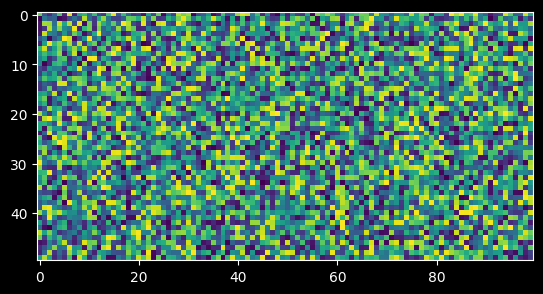

In [ ]:
plt.imshow(data[0].T)

---
<font color=green>Q2:</font>
<br><font color='green'>
Generate some random weights $W_{hh}, W_{xh}, b_h$
</font>

---

In [ ]:
W_hh = np.random.random((d, d))
W_xh = np.random.random((D, d))
b_h = np.random.random((d,))

---
<font color=green>Q3:</font>
<br><font color='green'>
Produce the output tensor with a shape of \((N, T, d)\) by generating the sequence \(h_1, \dots, h_T\) corresponding to each sequence \(x_1, \dots, x_T\):
1.   Initialize the Output Tensor : Create a tensor `H` with shape $(N, T, d)$ filled with zeros.
2.  Prepare for Iteration:
   - Determine the number of samples \(N\) from the input data.
   - Loop through each of the \(N\) samples.

3. Process Each Sample:
   - For each sample $i$, extract the sequence $X$ consisting of $T$ vectors of size $D$.
   - Initialize the hidden state $h_{t-1}$ with zeros of shape $(d,)$.
   - Create an empty list to store the generated hidden states $h_1, \dots, h_T$.

4. Generate Sequence of Hidden States:
   - For each element $x_t$ in the sequence $X$:
     - Compute the hidden state $h_t$ using the formula $h_t = \tanh(W_{xh}^T x_t + W_{hh}^T h_{t-1} + b_h)$.
     - Append $h_t$ to the list of outputs.
     - Update $h_{t-1}$ to the newly computed $h_t$.

5. Store the Sequence in the Output Tensor:
   - Convert the list of hidden states to a NumPy array and assign it to the corresponding slice of the output tensor $H[i]$.

</font>

---

In [ ]:
# Initialize the output tensor
H = np.zeros((N, T, d))
# The number of samples
N = data.shape[0]
# Loop through all the N samples
for i in range(N):
  # Get the sequence i compose of T vectors of size D
  X = data[i]
  # Initialize h_{0} with 0
  h_t_minus_one = np.zeros((d,))
  # Initialize an empty list for h_1, ..., h_T
  sequence_H = []
  # Loop through all the elements x_1, ..., x_T
  for x_t in X:
    # h_t = tanh(W_{xh}^T x_t + W_{hh}^T h_{t-1} + b_h)
    h_t = np.tanh(W_xh.T.dot(x_t) + W_hh.T.dot(h_t_minus_one) + b_h)
    # Put the output h_t in the list of outputs
    sequence_H.append(h_t)
    # Update the new hidden state
    h_t_minus_one = h_t
  H[i] = np.asarray(sequence_H)

---
<font color=green>Q4:</font>
<br><font color='green'>
Plot the shape of the output:
</font>

---

In [ ]:
H.shape

(1000, 100, 20)

# 2. MNIST Classification using LSTMs

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1KNpBc60u1QCopXygOff0tLkQNkyXuSmr"></center>

We aim to employ the LSTM layer for classifying the MNIST dataset, which consists of images shaped as $(60000, 28, 28)$. Each sample represents an image with dimensions $(28, 28)$. Viewing each image as a sequence, we can interpret it as having a length of $T = 28,$ with each element having a dimension of $D = 28$.

## 2.1 Loading the MNIST dataset

---
<font color=green>Q5:</font>
<br><font color='green'>
Retrieve the MNIST dataset by utilizing the `tf.keras.datasets.mnist.load_data`function.
</font>

---

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---
<font color=green>Q6:</font>
<br><font color='green'>
Print the shape of the data.
</font>

---

In [ ]:
X_train.shape

(60000, 28, 28)

---
<font color=green>Q7:</font>
<br><font color='green'>
Normalize the feature train and test data by dividing each pixel element by 255.
</font>

---

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

---
<font color=green>Q8:</font>
<br><font color='green'>
The targets represent categories ranging from 0 to 9. To encode them into a tensor of shape $(N, 10)$, utilize the to_categorical function from `tensorflow.keras.utils` for one-hot encoding.
</font>

---

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test,  num_classes = 10)

In [ ]:
y_train.shape

(60000, 10)

---
<font color=green>Q9:</font>
<br><font color='green'>
Build the specified model and train it using gradient descent optimization.</font>

---

<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1zCyhgITfxptmBzUDQ7-TPKsKugVyjtat"></center>

In [ ]:
# Set hyperparameters
T = X_train.shape[1]
D = X_train.shape[2]
d = 32
M = 64
N_epochs = 10

In [ ]:
# Import Modules
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

In [ ]:

#### Sequential API Answer
model = Sequential()
model.add(LSTM(d, return_sequences=False, input_shape = (T,D)))
model.add(Dense(10, activation='softmax'))
model.summary()

# Compile
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Train the model
print('Training model...')
history = model.fit(X_train, y_train,
              batch_size=M,
              epochs=N_epochs,
              validation_split=0.3)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.5399 - loss: 1.3745 - val_accuracy: 0.8796 - val_loss: 0.3975
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9067 - loss: 0.3236 - val_accuracy: 0.9351 - val_loss: 0.2292
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9382 - loss: 0.2131 - val_accuracy: 0.9438 - val_loss: 0.1910
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9488 - loss: 0.1742 - val_accuracy: 0.9526 - val_loss: 0.1589
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9583 - loss: 0.1446 - val_accuracy: 0.9554 - val_loss: 0.1519
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9611 - loss: 0.1341 - val_accuracy: 0.9602 - val_loss: 0.1347
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9680 - loss: 0.1120 - val_accuracy: 0.9663 - val_loss: 0.1185
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9715

In [ ]:

#### Function API Answers
# The input is an image of shape (T, D)
input_layer = Input(shape=(T, D))

# The LSTM layer
lstm = LSTM(d, return_sequences=False)

# Apply the LSTM layer on the input
y_T = lstm(input_layer) # output is N x d

# Apply a Dense layer with 10 neurons and a softmax activation function
output = Dense(10, activation='softmax')(y_T)

# Create the model to map the input to the output
model = Model(inputs=input_layer, outputs=output)
model.summary()

# Compile
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Train the model
print('Training model...')
history = model.fit(X_train, y_train,
              batch_size=M,
              epochs=N_epochs,
              validation_split=0.3)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
  1/657 ━━━━━━━━━━━━━━━━━━━━ 33:28 3s/step - accuracy: 0.0469 - loss: 2.3042

KeyboardInterrupt: 

---
<font color=green>Q10:</font>
<br><font color='green'>
Visualize the training and validation loss, as well as the training and validation accuracy, through plots.
</font>

---

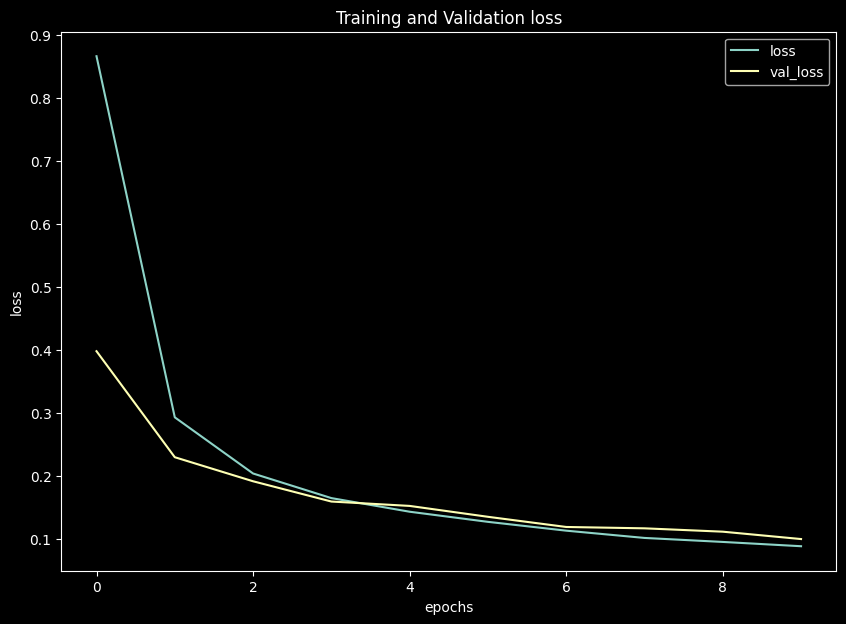

In [ ]:
# Plot the training loss and the validation loss
fig, ax = plt.subplots(figsize = (10, 7))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training and Validation loss")
plt.legend()
plt.show()


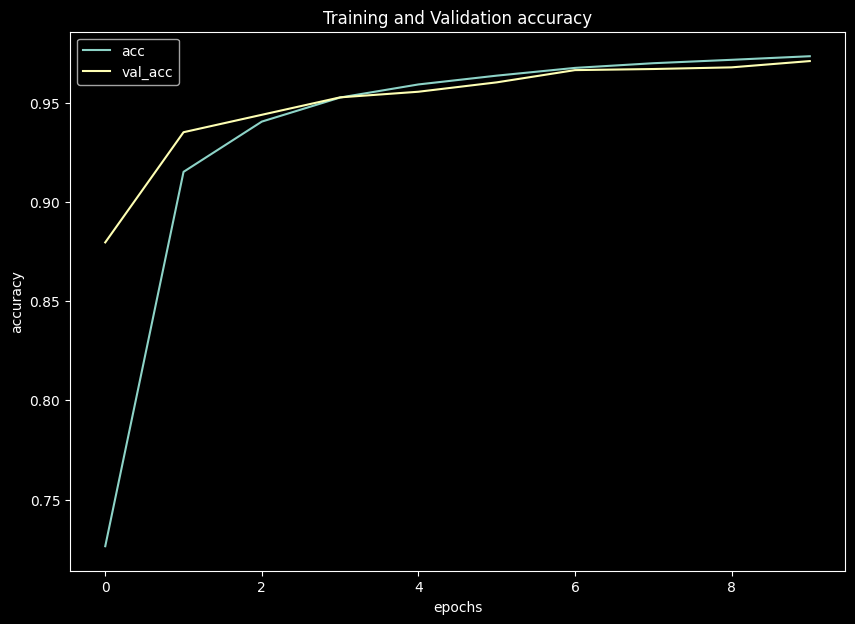

In [ ]:
# Plot the training accuracy and the validation accuracy
fig, ax = plt.subplots(figsize = (10, 7))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

# Wrap-up


In this coding session, we've gained insights into the following:

* Implementing the RNN layer from scratch using Numpy, facilitating a deeper understanding of data transformations.
* Conducting a classification task on data with dimensions (N, T, D) by leveraging LSTM networks.

